In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [12]:
input_cols = [
#     'ANGER', 'CONTEMPT', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRAL', 'SADNESS', 'SURPRISE', 
    'picture_valence', 'picture_arousal', 'sound_valence', 'sound_arousal', 
    'ans_time', 'emotion_ans', 'valence_ans', 'arousal_ans',
    'picture_valence_diff', 'picture_arousal_diff',
    'sound_valence_diff', 'sound_arousal_diff'
]
output_cols = [
    'extraversion',"openness","conscientiousness","agreeableness","neurocism" 
]

dataset = pd.read_csv("preprocessed/ALL-DATA-2.csv")

data = dataset[input_cols]

data.describe()

,picture_valence,picture_arousal,sound_valence,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans,picture_valence_diff,picture_arousal_diff,sound_valence_diff,sound_arousal_diff
count,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000,17709.000000
mean,0.007493,0.258729,0.044516,0.203563,15.387507,0.882771,-0.556909,-0.466617,-0.564402,-0.725347,-0.601425,-0.670181
std,0.673905,0.453647,0.617693,0.437411,33.092150,2.064121,0.576375,0.627781,0.783087,0.747054,0.807857,0.733923
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000186,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-0.640867,0.061453,-0.547049,-0.034483,0.766920,-1.000000,-1.000000,-1.000000,-1.210526,-1.402235,-1.297778,-1.300493
50%,-0.018576,0.363128,0.122807,0.256158,2.235797,1.000000,-1.000000,-1.000000,-0.402477,-0.782123,-0.535885,-0.729064
75%,0.678019,0.569832,0.639553,0.502463,5.305965,3.000000,-0.033442,0.025472,-0.027864,-0.128492,-0.081047,-0.116835
max,1.000000,1.000000,1.000000,1.000000,100.000000,5.000000,1.000000,1.000000,1.842357,1.910615,1.993620,1.819130


In [13]:
scaler_x = preprocessing.MinMaxScaler()
xscale = scaler_x.fit_transform(data)

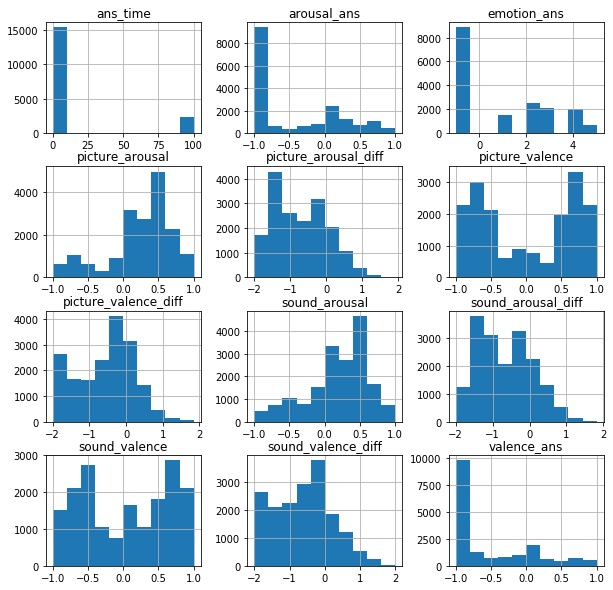

In [15]:
data.hist(figsize=(10, 10))
plt.savefig("histogram.png")

In [25]:
from sklearn.preprocessing import minmax_scale

all_columns = input_cols.copy()
all_columns.extend(output_cols)


dataset_2 = dataset[all_columns]

dataset_2 = dataset_2.where(dataset_2["emotion_ans"] == -1)
dataset_2 = dataset_2.dropna()

scaler = preprocessing.MinMaxScaler()


normalized = scaler.fit_transform(dataset_2[dataset_2.columns].values)

data_scaled = pd.DataFrame(normalized, columns=all_columns)

# dataset_2_scaled = scaler_x.fit_transform(dataset_2)
dataset_2.head()

,picture_valence,picture_arousal,sound_valence,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans,picture_valence_diff,picture_arousal_diff,sound_valence_diff,sound_arousal_diff,extraversion,openness,conscientiousness,agreeableness,neurocism
2,0.879257,0.402235,-0.444976,0.211823,1.785309,-1.0,0.483333,0.163721,-0.395924,-0.238513,0.928309,-0.048101,5.0,3.0,6.0,5.0,2.0
3,-0.842105,0.106145,0.521531,-0.157635,2.653014,-1.0,-0.995714,0.180954,-0.153609,0.074809,-1.517245,0.338589,5.0,3.0,6.0,5.0,2.0
8,0.216718,-0.888268,0.279107,-0.586207,0.600789,-1.0,-0.033442,-0.190947,-0.250160,0.697321,-0.312549,0.395260,5.0,3.0,6.0,5.0,2.0
14,0.588235,0.843575,0.617225,0.665025,2.769680,-1.0,0.399832,0.438916,-0.188403,-0.404659,-0.217393,-0.226109,5.0,3.0,6.0,5.0,2.0
22,-0.814241,0.022346,0.543860,0.669951,4.771642,-1.0,-0.428892,0.172837,0.385349,0.150491,-0.972752,-0.497114,5.0,3.0,6.0,5.0,2.0


In [26]:
data_scaled.head(20)

,picture_valence,picture_arousal,sound_valence,sound_arousal,ans_time,emotion_ans,valence_ans,arousal_ans,picture_valence_diff,picture_arousal_diff,sound_valence_diff,sound_arousal_diff,extraversion,openness,conscientiousness,agreeableness,neurocism
0,0.939628,0.701117,0.277512,0.605911,0.017850,0.0,0.741666,0.581861,0.416060,0.439601,0.728254,0.497030,0.444444,0.222222,0.555556,0.444444,0.111111
1,0.078947,0.553073,0.760766,0.421182,0.026527,0.0,0.002143,0.590477,0.479277,0.521302,0.104429,0.601191,0.444444,0.222222,0.555556,0.444444,0.111111
2,0.608359,0.055866,0.639553,0.206897,0.006005,0.0,0.483279,0.404526,0.454088,0.683626,0.411730,0.616457,0.444444,0.222222,0.555556,0.444444,0.111111
3,0.794118,0.921788,0.808612,0.832512,0.027694,0.0,0.699916,0.719458,0.470200,0.396278,0.436003,0.449081,0.444444,0.222222,0.555556,0.444444,0.111111
4,0.092879,0.511173,0.771930,0.834975,0.047714,0.0,0.285554,0.586418,0.619885,0.541037,0.243322,0.376081,0.444444,0.222222,0.555556,0.444444,0.111111
5,0.032508,0.594972,0.692185,0.716749,0.032697,0.0,0.420855,0.726329,0.721982,0.570299,0.353032,0.515148,0.444444,0.222222,0.555556,0.444444,0.111111
6,0.202786,0.681564,0.901116,0.509852,0.028193,0.0,0.409420,0.653432,0.627168,0.487124,0.240607,0.587338,0.444444,0.222222,0.555556,0.444444,0.111111
7,0.803406,0.511173,0.132376,0.477833,0.045379,0.0,0.500757,0.497540,0.361437,0.494685,0.679393,0.520604,0.444444,0.222222,0.555556,0.444444,0.111111
8,0.767802,0.639665,0.065391,0.724138,0.031532,0.0,0.000000,0.538852,0.118732,0.449220,0.458096,0.410167,0.444444,0.222222,0.555556,0.444444,0.111111
9,0.764706,0.734637,0.047847,0.945813,0.025358,0.0,0.446683,0.645940,0.353416,0.455539,0.694931,0.348435,0.444444,0.222222,0.555556,0.444444,0.111111


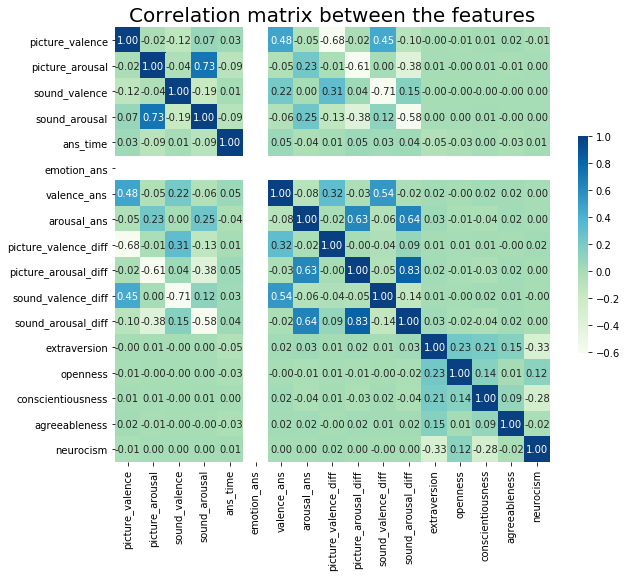

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_scaled.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()
plt.savefig("correlation.png")

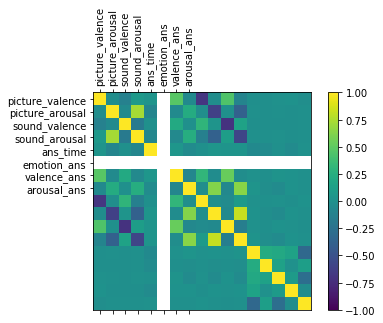

<Figure size 432x288 with 0 Axes>

In [28]:
correlations = dataset_2.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_2.columns)
ax.set_yticklabels(dataset_2.columns)
plt.xticks(rotation=90)
plt.show()
plt.savefig("correlation.png")